In [88]:
# basic imports 
import matplotlib.pyplot as plt 
from pathlib import Path 
from importlib import reload 

# Learning imports 
import torch 
import gymnasium as gym

# Custom imports 
from RLManager import * 
import MissileEnv

In [140]:
# Load the model 
save_loc = Path('Output')
model = torch.load(save_loc / 'ModelTorch.pkl', weights_only=False)  # Needs access to DQN class 
# model = torch.load(Path('Archive') / 'CartPole_01' / 'ModelTorch.pkl', weights_only=False)

In [144]:
# Test the model 
reload(MissileEnv)

# env = gym.make("CartPole-v1", render_mode='human')
# name = 'cart' 

env = MissileEnv.MissileEnv()
env.render_mode = 'human'
env.follow_missile = False
name = 'missile'

observation, info = env.reset()

# Run the model
n = 500
actions = []
da = (env.action_size-1)/2
for _ in range(n):
    print(f"Step {_}")
    # action = env.action_space.sample()
    state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)
    # action = (model(state).max(1).indices.view(1, 1)-da)/da
    action = model(state).max(1).indices.view(1, 1)
    actions.append((action.cpu().numpy()[0][0]-da)/da)
    observation,reward, terminated, truncated, info = env.step(action.item())
    # print("info : ",info);
    print(f"obs   : {observation}")
    
    if terminated or truncated:
        observation, info = env.reset()

Step 0
env action: 0.5
obs   : [0.74431244 0.66783156 0.74431244 0.66783156 0.19130203]
Step 1
env action: 0.5
obs   : [0.53498595 0.84486095 0.53498595 0.84486095 0.15983042]
Step 2
env action: 0.5
obs   : [0.19921119 0.97995658 0.19921119 0.97995658 0.14217417]
Step 3
env action: 0.5
obs   : [-0.202037    0.97937789 -0.202037    0.97937789  0.14357672]
Step 4
env action: 0.5
obs   : [-0.52785017  0.8493375  -0.52785017  0.8493375   0.16354513]
Step 5
env action: 0.5
obs   : [-0.73033598  0.6830881  -0.73033598  0.6830881   0.1964558 ]
Step 6
env action: 0.5
obs   : [-0.84549857  0.53397769 -0.84549857  0.53397769  0.23690805]
Step 7
env action: 0.5
obs   : [-0.91145065  0.41140943 -0.91145065  0.41140943  0.28158584]
Step 8
env action: 0.5
obs   : [-0.95037162  0.311117   -0.95037162  0.311117    0.32867441]
Step 9
env action: 0.5
obs   : [-0.97380125  0.22740081 -0.97380125  0.22740081  0.37716774]
Step 10
env action: 0.5
obs   : [-0.9877948   0.15576083 -0.9877948   0.15576083  0.4

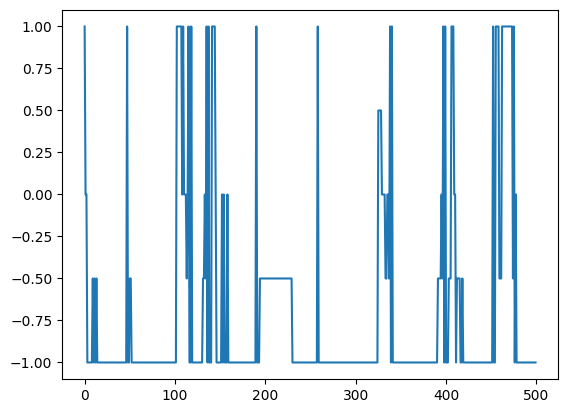

In [135]:
# actions[0].cpu().numpy()[0][0]
plt.plot(actions)

In [75]:
observation.shape
model

DQN(
  (layer1): Linear(in_features=4, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=2, bias=True)
)